## Ethereum Price Prediction (SVM)

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

## Set up DataFrame

We'll use past Ethereum Market price data

In [3]:
eth = pd.read_csv('2019-02-27_2021-11-03_ethereumprice_org.csv')


In [4]:
eth.head()

,timestamp,open,high,low,close
0,1635897600,4598.000000,undefined,undefined,undefined
1,1635811200,4324.210000,4601.65,4289.01,4586.39
2,1635811140,4325.548484,undefined,undefined,undefined
3,1635724800,4295.350000,4377.057021011002,4166.283329212807,4326.88
4,1635724740,4290.160000,undefined,undefined,undefined


In [5]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 5 columns):
timestamp    1140 non-null int64
open         1140 non-null float64
high         1140 non-null object
low          1140 non-null object
close        1140 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 44.6+ KB


In [6]:
eth.describe()

,timestamp,open
count,1.140000e+03,1140.000000
mean,1.597189e+09,1118.733104
std,2.470849e+07,1218.438370
min,1.551226e+09,111.275258
25%,1.575828e+09,193.906413
50%,1.600344e+09,381.453748
75%,1.618294e+09,1967.792534
max,1.635898e+09,4598.000000


In [7]:
eth.columns

Index(['timestamp', 'open', 'high', 'low', 'close'], dtype='object')

# EDA

Let's create some simple plots to check out the data

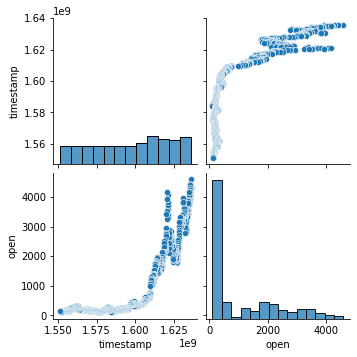

In [12]:
sns.pairplot(eth)

<AxesSubplot:xlabel='open', ylabel='Density'>

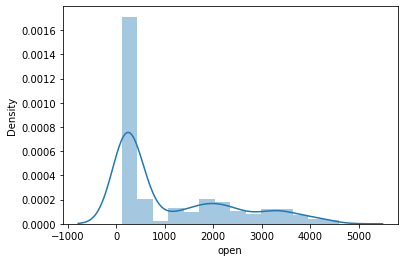

In [15]:
sns.distplot(eth['open'])

In [8]:
eth = eth[eth.high.str[:] != "undefined"]
eth = eth[eth.low.str[:] != "undefined"]
eth = eth[eth.close.str[:] != "undefined"]

In [10]:
eth['open'] = eth['open'].astype(str).astype(float)
eth['high'] = eth['high'].astype(str).astype(float)
eth['low'] = eth['low'].astype(str).astype(float)
eth['close'] = eth['close'].astype(str).astype(float)
eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 1 to 1139
Data columns (total 5 columns):
timestamp    978 non-null int64
open         978 non-null float64
high         978 non-null float64
low          978 non-null float64
close        978 non-null float64
dtypes: float64(4), int64(1)
memory usage: 45.8 KB


# Exploratory Data Analysis
## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(eth, np.ravel(eth['open']), test_size=0.30, random_state=101)

# Train the Support Vector Classifier

In [81]:
from sklearn.svm import SVC

In [82]:
model = SVC()

In [83]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [84]:
model.fit(X_train, training_scores_encoded)

C:\Users\Berkay\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
test_scores_encoded = lab_enc.fit_transform(y_test)
svr_rbf_confidence = model.score(X_test,test_scores_encoded)
print('SVR_RBF accuracy :',svr_rbf_confidence)

## Predictions and Evaluations

Now let's predict using the trained model.

In [85]:
predictions = model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(test_scores_encoded,predictions))

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(classification_report(test_scores_encoded,predictions))